**Author Names:**

Sumedha Banerjee

Saptaparna Ghosh

Saikat Dhara

Rishabh Kumar Addya

In [ ]:
import pandas as pd

# Model names and their corresponding accuracies
models = ["VGG16", "VGG19", "InceptionV3", "ResNet50", "MobileNetV1"]
accuracies = [0.9345, 0.9399, 0.9422, 0.9716, 0.9546]

# Create a DataFrame
df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies
})

# Display the DataFrame
print(df)


         Model  Accuracy
0        VGG16    0.9345
1        VGG19    0.9399
2  InceptionV3    0.9422
3     ResNet50    0.9716
4  MobileNetV1    0.9546


#### Checking no of images in each folders

In [ ]:
import os

# Define the directory containing the folders with images
dataset_dir = "/content/drive/MyDrive/dataset"

# Function to count images in a directory
def count_images_in_dir(directory):
    count = 0
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            count += 1
    return count

# Function to count images in each subdirectory
def count_images_in_subdirs(parent_dir):
    for subdir, _, _ in os.walk(parent_dir):
        if os.path.isdir(subdir):
            print(f"Folder: {subdir}, Number of images: {count_images_in_dir(subdir)}")

# Count images in each subdirectory
count_images_in_subdirs(dataset_dir)


Folder: /content/drive/MyDrive/dataset, Number of images: 0
Folder: /content/drive/MyDrive/dataset/Moderate DR, Number of images: 900
Folder: /content/drive/MyDrive/dataset/Severe DR, Number of images: 190
Folder: /content/drive/MyDrive/dataset/Mild DR, Number of images: 370
Folder: /content/drive/MyDrive/dataset/Healthy, Number of images: 1000
Folder: /content/drive/MyDrive/dataset/Proliferate DR, Number of images: 290


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#### Create a dataset of Diabetic Retinopathy images (by combining Severe, Proliferate, Moderate dataset) and balanced with healthy datase's no of images

Don't run again this code


In [ ]:
import os
import random
import shutil

# Define source directories and image counts
source_dirs = {
    "/content/drive/MyDrive/dataset/Severe DR": 190,
    "/content/drive/MyDrive/dataset/Proliferate DR": 290,
    "/content/drive/MyDrive/dataset/Moderate DR": 520  # Out of 900
}
target_dir = "/content/drive/MyDrive/DR_presence"
target_count = 1000

# Create target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Function to randomly select images from a directory
def select_random_images(source_dir, num_images):
    images = os.listdir(source_dir)
    random.shuffle(images)
    selected_images = images[:num_images]
    return selected_images

# Copy images to target directory
total_images_copied = 0
for source_dir, count in source_dirs.items():
    images_to_copy = min(count, target_count - total_images_copied)
    selected_images = select_random_images(source_dir, images_to_copy)
    for image_name in selected_images:
        source_path = os.path.join(source_dir, image_name)
        target_path = os.path.join(target_dir, image_name)
        shutil.copy(source_path, target_path)
        total_images_copied += 1

    if total_images_copied >= target_count:
        break

# Count images in the new folder
num_images_in_folder = len(os.listdir(target_dir))
print(f"Total images copied to 'DR_presence': {num_images_in_folder}")


Total images copied to 'DR_presence': 1000


#### Check random image size which is require for future use.

In [ ]:
import os
import random
# from PIL import Image (not mandatory)

# Define the directory containing the images
target_dir = "/content/drive/MyDrive/dataset/Healthy"

# Function to randomly select 5 images
def select_random_images(directory, num_images):
    images = os.listdir(directory)
    random.shuffle(images)
    selected_images = images[:num_images]
    return selected_images

# Function to get the size of an image
def get_image_size(image_path):
    with Image.open(image_path) as img:
        return img.size

# Select 5 random images
selected_images = select_random_images(target_dir, 5)

# Print the sizes of the selected images
for image_name in selected_images:
    image_path = os.path.join(target_dir, image_name)
    image_size = get_image_size(image_path)
    print(f"Image: {image_name}, Size: {image_size}")


Image: Healthy_724.png, Size: (256, 256)
Image: Healthy_309.png, Size: (256, 256)
Image: Healthy_915.png, Size: (256, 256)
Image: Healthy_925.png, Size: (256, 256)
Image: Healthy_132.png, Size: (256, 256)


#### Convert every images into 1d array and label them accordingly

In [ ]:
import os
import numpy as np
from PIL import Image

def process_images_in_directory(directory, label):
    image_arrays = []
    labels = []
    # Iterate through each image in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            # Construct image path
            image_path = os.path.join(directory, filename)
            # Open image
            with Image.open(image_path) as img:
                # Convert to numpy array
                img_array = np.array(img)
                # Flatten each color channel separately
                red_channel = img_array[:,:,0].flatten()
                green_channel = img_array[:,:,1].flatten()
                blue_channel = img_array[:,:,2].flatten()
                # Concatenate the channels into a single 1D array
                img_flat = np.concatenate((red_channel, green_channel, blue_channel))
                # Append image array and label
                image_arrays.append(img_flat)
                labels.append(label)
    return np.array(image_arrays), np.array(labels)

# Process images in the Healthy directory (label 0)
healthy_dir = "/content/drive/MyDrive/dataset/Healthy"
healthy_images, healthy_labels = process_images_in_directory(healthy_dir, label=0)

# Process images in the DR_presence directory (label 1)
presence_dir = "/content/drive/MyDrive/DR_presence"
presence_images, presence_labels = process_images_in_directory(presence_dir, label=1)

# Concatenate images and labels
all_images = np.concatenate((healthy_images, presence_images))
all_labels = np.concatenate((healthy_labels, presence_labels))

print("Shape of all images array:", all_images.shape)
print("Shape of all labels array:", all_labels.shape)


Shape of all images array: (2000, 196608)
Shape of all labels array: (2000,)


#### Shuffle the dataset

In [ ]:
import numpy as np

# Get the number of images
num_images = all_images.shape[0]

# Create shuffled indices
shuffled_indices = np.arange(num_images)
np.random.shuffle(shuffled_indices)

# Use shuffled indices to shuffle images and labels
shuffled_images = all_images[shuffled_indices]
shuffled_labels = all_labels[shuffled_indices]

print("Shape of shuffled images array:", shuffled_images.shape)
print("Shape of shuffled labels array:", shuffled_labels.shape)


Shape of shuffled images array: (2000, 196608)
Shape of shuffled labels array: (2000,)


#### Separate and check dependent feature and independent feature

In [ ]:
# Independent features (images)
X = shuffled_images

# Dependent features (labels)
y = shuffled_labels

print("Shape of independent features (images) array:", X.shape)
print("Shape of dependent features (labels) array:", y.shape)


Shape of independent features (images) array: (2000, 196608)
Shape of dependent features (labels) array: (2000,)


#### Split the dataset for model training

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Number of samples in training set:", X_train.shape)
print("Number of samples in test set:", X_test.shape)
print("Number of samples in training set:", y_train.shape)
print("Number of samples in test set:", y_test.shape)


Number of samples in training set: (1400, 196608)
Number of samples in test set: (600, 196608)
Number of samples in training set: (1400,)
Number of samples in test set: (600,)


#### Reshaping the fetaures

In [ ]:
# Reshape the input data to match the expected shape of the model's input layer
X_train = X_train.reshape(-1, 256, 256, 3)
X_test = X_test.reshape(-1, 256, 256, 3)

print("Number of samples in training set:", X_train.shape)
print("Number of samples in test set:", X_test.shape)

Number of samples in training set: (1400, 256, 256, 3)
Number of samples in test set: (600, 256, 256, 3)


#### Build Custom CNN model:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

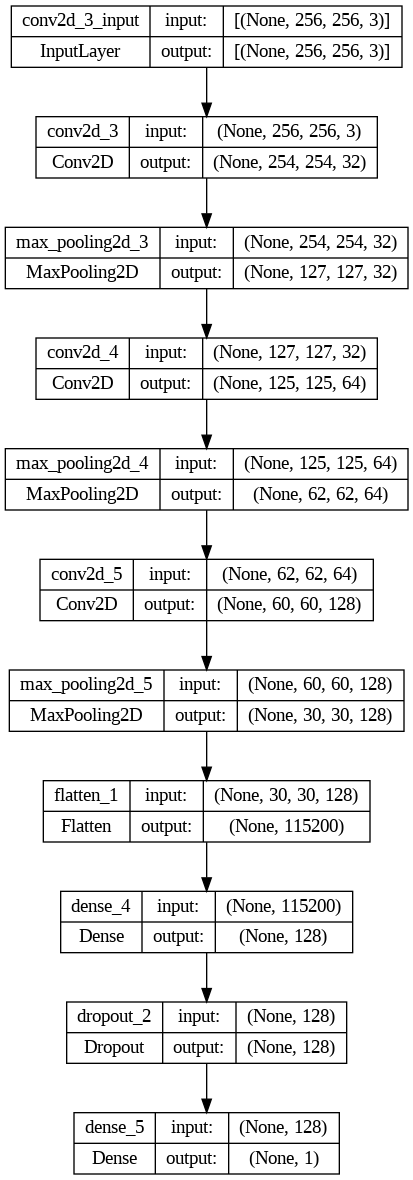

In [ ]:
# Plot the model and save to a file
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


#### Fit the model:

In [ ]:
# Now fit the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Cusstom model Test Loss:", test_loss)
print("Custom model Test Accuracy:", test_accuracy)


Epoch 1/10
44/44 [==============================] - 5s 76ms/step - loss: 68.6369 - accuracy: 0.6029 - val_loss: 0.4068 - val_accuracy: 0.8883
Epoch 2/10
44/44 [==============================] - 3s 75ms/step - loss: 0.3305 - accuracy: 0.8807 - val_loss: 0.2185 - val_accuracy: 0.9133
Epoch 3/10
44/44 [==============================] - 3s 67ms/step - loss: 0.2361 - accuracy: 0.9100 - val_loss: 0.2049 - val_accuracy: 0.9133
Epoch 4/10
44/44 [==============================] - 3s 66ms/step - loss: 0.2351 - accuracy: 0.9100 - val_loss: 0.2276 - val_accuracy: 0.9050
Epoch 5/10
44/44 [==============================] - 3s 66ms/step - loss: 0.3696 - accuracy: 0.9029 - val_loss: 0.2147 - val_accuracy: 0.8983
Epoch 6/10
44/44 [==============================] - 3s 67ms/step - loss: 0.1987 - accuracy: 0.9229 - val_loss: 0.1803 - val_accuracy: 0.9283
Epoch 7/10
44/44 [==============================] - 3s 68ms/step - loss: 0.1723 - accuracy: 0.9371 - val_loss: 0.1655 - val_accuracy: 0.9283
Epoch 8/10
4

#### Plot Loss and Accuracy curve for both training and validation data


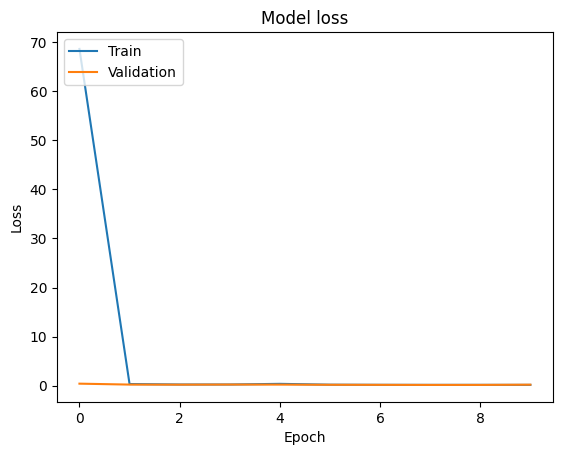

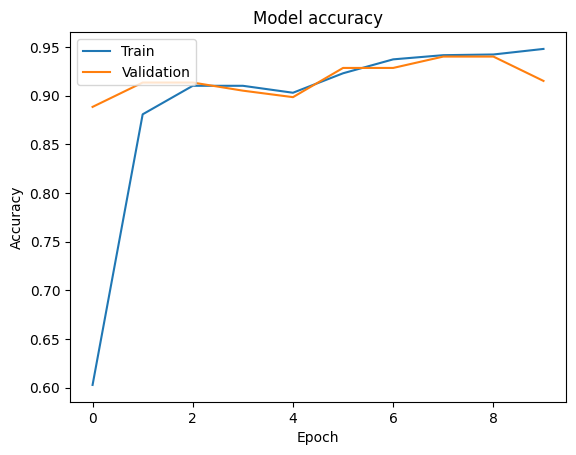

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#### Plot confusion matrix

19/19 [==============================] - 0s 17ms/step


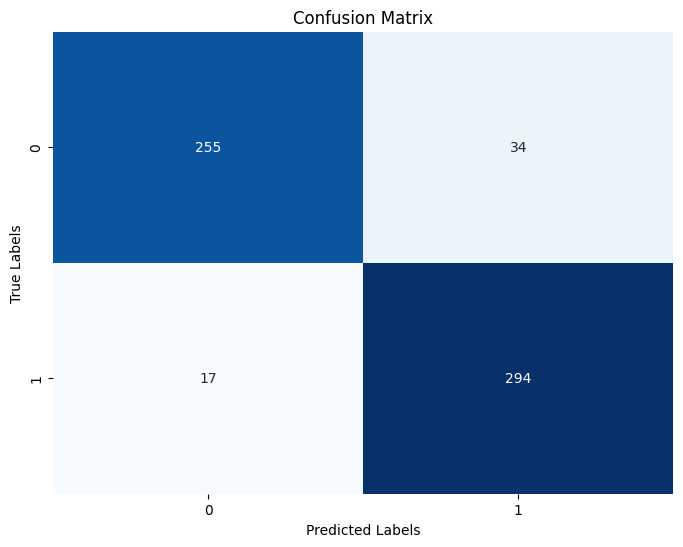

In [ ]:
# Get the model predictions on the test data
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#### Plot ROC curve and check AUC score

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.94      0.88      0.91       289
           1       0.90      0.95      0.92       311

    accuracy                           0.92       600
   macro avg       0.92      0.91      0.91       600
weighted avg       0.92      0.92      0.91       600



19/19 [==============================] - 0s 21ms/step


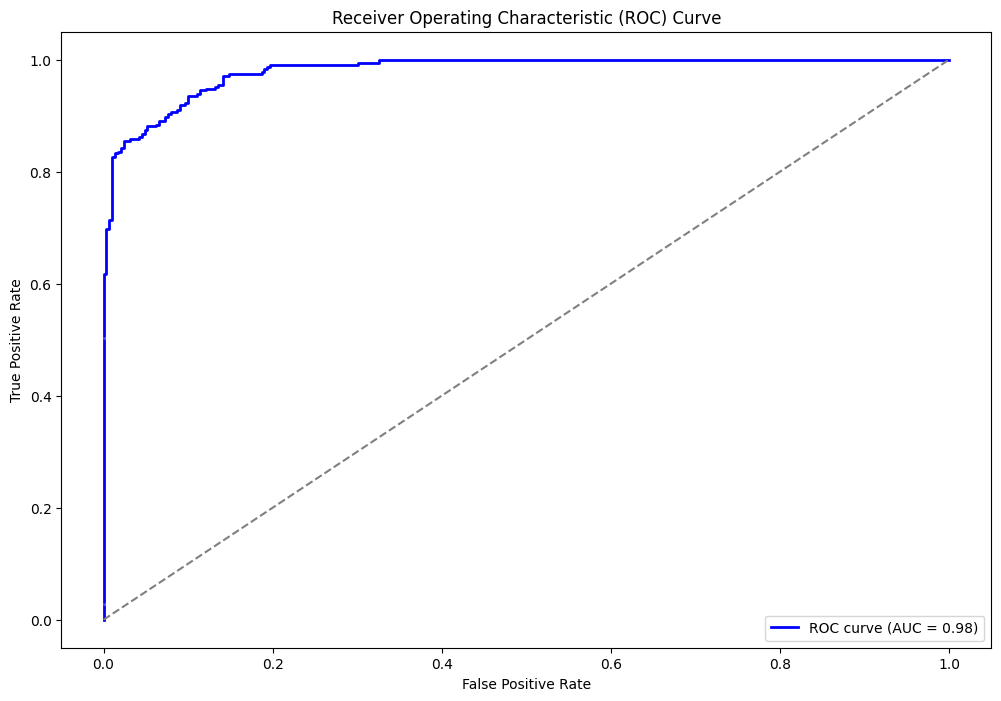

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and X_test are already defined and contain the test labels and features

# Get predicted probabilities for the positive class
y_pred_prob = model.predict(X_test)

# Extract probabilities of the positive class
y_pred_prob_positive = y_pred_prob[:, 0]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_positive)

# Calculate the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Annotate FPR and TPR values at selected thresholds
for i in range(len(thresholds)):
    if i % 10 == 0:  # Annotate every 10th threshold for readability, adjust as necessary
        plt.annotate(f'Thr={thresholds[i]:.2f}\nFPR={fpr[i]:.2f}\nTPR={tpr[i]:.2f}',
                     (fpr[i], tpr[i]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center',
                     fontsize=0,
                     color='white')

plt.show()


#### Prediction on new data:

1/1 [==============================] - 0s 296ms/step
Probability of presence of diabetic retinopathy: 0.8691265


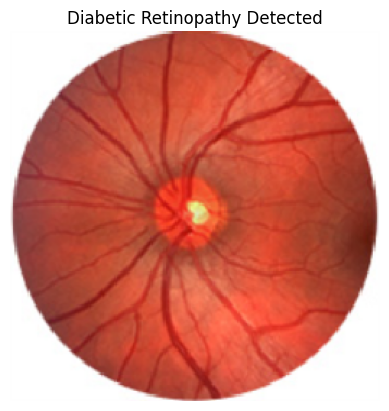

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Load and preprocess the image
img_path = "/content/drive/MyDrive/normal_eye.png"
img = image.load_img(img_path, target_size=(256, 256))  # Resize the image to match the input shape of the model
img_array = image.img_to_array(img) # Convert image to array and scale pixel values to [0, 1]
img_array = img_array.reshape((1,) + img_array.shape)  # Add batch dimension

# Make prediction
prediction = model.predict(img_array)

# Print prediction
print("Probability of presence of diabetic retinopathy:", prediction[0][0])

# Define threshold
threshold = 0.5

# Label prediction based on threshold
if prediction[0][0] < threshold:
    label = "Healthy"
else:
    label = "Diabetic Retinopathy Detected"

# Display the image
plt.imshow(img)
plt.axis('off')
plt.title(label)
plt.show()



1/1 [==============================] - 0s 17ms/step
Probability of presence of diabetic retinopathy: 0.54815894


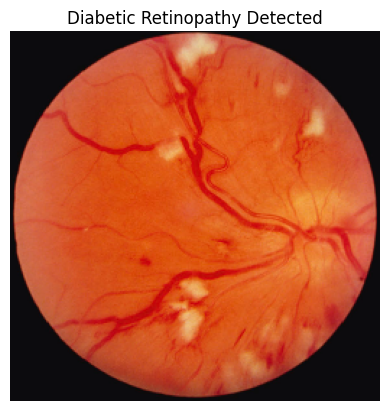

In [ ]:
import matplotlib.pyplot as plt

# Load and preprocess the image
img_path = "/content/drive/MyDrive/DR_images.png"
img = image.load_img(img_path, target_size=(256, 256))  # Resize the image to match the input shape of the model
img_array = image.img_to_array(img) # Convert image to array and scale pixel values to [0, 1]
img_array = img_array.reshape((1,) + img_array.shape)  # Add batch dimension

# Make prediction
prediction = model.predict(img_array)

# Print prediction
print("Probability of presence of diabetic retinopathy:", prediction[0][0])

# Define threshold
threshold = 0.5

# Label prediction based on threshold
if prediction[0][0] < threshold:
    label = "Healthy"
else:
    label = "Diabetic Retinopathy Detected"

# Display the image
plt.imshow(img)
plt.axis('off')
plt.title(label)
plt.show()



#### Implementing transfer learning (ResNet50) model:


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras import layers, Model

# Load the pre-trained ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add your custom classifier layers on top of the ResNet50 base
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
predictions = layers.Dense(1, activation='sigmoid')(x)

# Combine the base model and custom layers into a new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print summary of the base model
print("Base Model Summary:")
base_model.summary()

# Print summary of the custom layers added
print("\nCustom Layers Summary:")
print("GlobalAveragePooling2D")
print("Dense (128 units, ReLU)")
print("Dropout (0.3)")
print("Dense (1 unit, Sigmoid)")

# Optionally, you can print the full model summary
print("\nFull Model Summary:")
model.summary()


Base Model Summary:
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                   

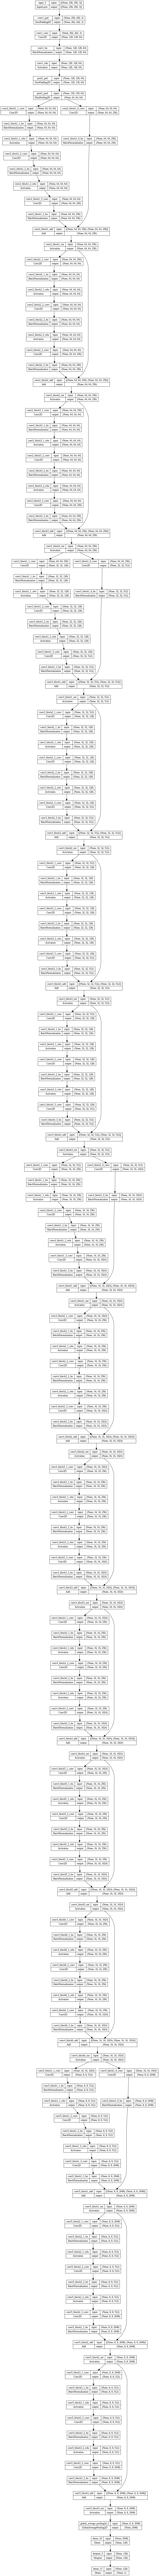

In [ ]:
# Plot the model and save to a file
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='Resnet_model_plot.png', show_shapes=True, show_layer_names=True)


#### Fit the model:

In [ ]:
# Now fit the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Resnet50 model Test Loss:", test_loss)
print("Resnet50 model Test Accuracy:", test_accuracy)


Epoch 1/10
44/44 [==============================] - 13s 204ms/step - loss: 0.2969 - accuracy: 0.8907 - val_loss: 0.1530 - val_accuracy: 0.9400
Epoch 2/10
44/44 [==============================] - 7s 169ms/step - loss: 0.1750 - accuracy: 0.9357 - val_loss: 0.1246 - val_accuracy: 0.9550
Epoch 3/10
44/44 [==============================] - 7s 167ms/step - loss: 0.1395 - accuracy: 0.9571 - val_loss: 0.1048 - val_accuracy: 0.9633
Epoch 4/10
44/44 [==============================] - 8s 180ms/step - loss: 0.1414 - accuracy: 0.9486 - val_loss: 0.1185 - val_accuracy: 0.9550
Epoch 5/10
44/44 [==============================] - 8s 179ms/step - loss: 0.1303 - accuracy: 0.9507 - val_loss: 0.0944 - val_accuracy: 0.9700
Epoch 6/10
44/44 [==============================] - 7s 170ms/step - loss: 0.1140 - accuracy: 0.9600 - val_loss: 0.1781 - val_accuracy: 0.9267
Epoch 7/10
44/44 [==============================] - 7s 169ms/step - loss: 0.1136 - accuracy: 0.9600 - val_loss: 0.0949 - val_accuracy: 0.9733
Epoch

#### Plot Loss and Accuracy curve for both training and validation data

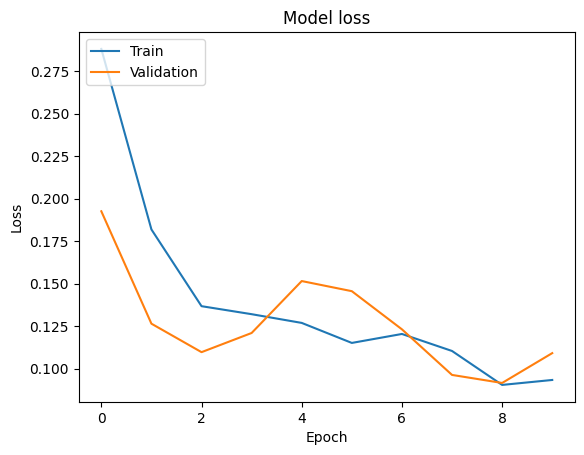

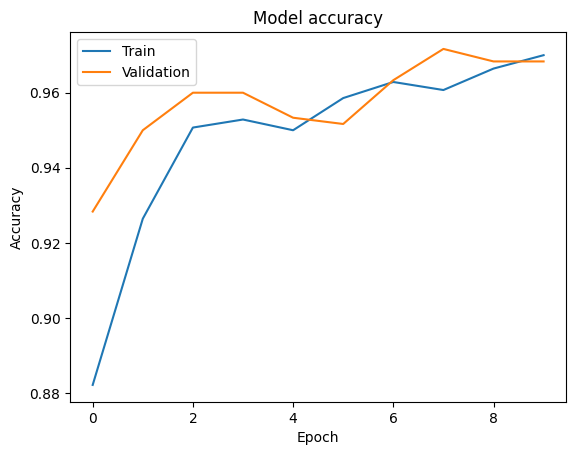

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#### Plotting Confusion Matrix

19/19 [==============================] - 3s 113ms/step


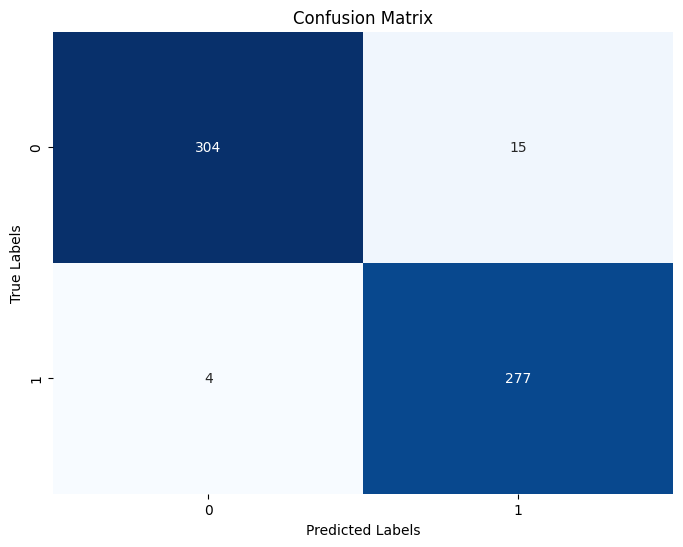

In [ ]:
# Get the model predictions on the test data
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#### Check classification report

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.99      0.95      0.97       319
           1       0.95      0.99      0.97       281

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



#### Plot ROC curve and check AUC score

19/19 [==============================] - 4s 116ms/step


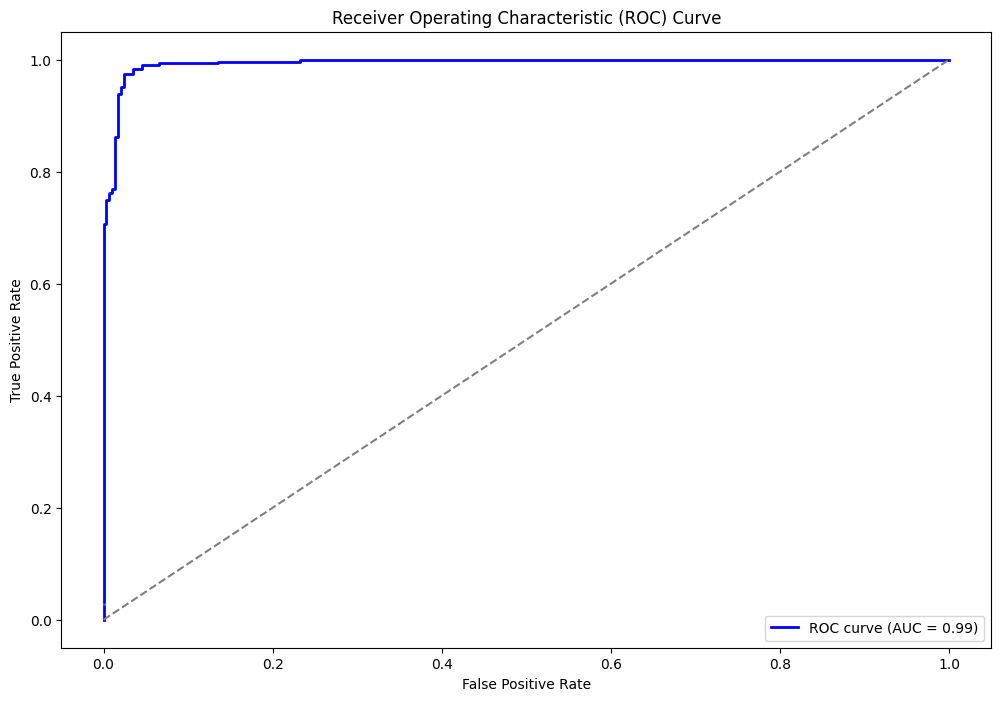

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and X_test are already defined and contain the test labels and features

# Get predicted probabilities for the positive class
y_pred_prob = model.predict(X_test)

# Extract probabilities of the positive class
y_pred_prob_positive = y_pred_prob[:, 0]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_positive)

# Calculate the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Annotate FPR and TPR values at selected thresholds
for i in range(len(thresholds)):
    if i % 10 == 0:  # Annotate every 10th threshold for readability, adjust as necessary
        plt.annotate(f'Thr={thresholds[i]:.2f}\nFPR={fpr[i]:.2f}\nTPR={tpr[i]:.2f}',
                     (fpr[i], tpr[i]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center',
                     fontsize=0,
                     color='white')

plt.show()


In [ ]:
tf.keras.models.save_model(model,'finalized.h5')